In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [82]:
# Load Dataset
df = pd.read_csv(r'/Users/sachintony/Desktop/BCA/6BCA/ML/USRECD.csv')
print(df.head())
print(df.info())

   Year     Month     Region Home Size Purchase Completion  \
0  2022  December    Midwest    Double                  No   
1  2022  December    Midwest   Single                   No   
2  2022  December    Midwest    Total1                  No   
3  2022  December  Northeast    Double                  No   
4  2022  December  Northeast   Single                   No   

   Average Sales Price  Number of Households (Thousands)  \
0               144300                             28280   
1                82300                             28280   
2               104700                             28280   
3               158300                             22630   
4                75300                             22630   

   Median Income - Current Dollars  Median Income - 2022 Dollars  \
0                            73070                         73070   
1                            73070                         73070   
2                            73070                         730

In [83]:
#2. Exploratory Data Analysis (EDA)
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Fill missing values for numerical and categorical columns
for col in df.columns:
    if df[col].dtype == "object":  # Categorical
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:  # Numerical
        df[col].fillna(df[col].median(), inplace=True)

print("After Handling Missing Values:\n", df.isnull().sum())

Missing Values:
 Year                                0
Month                               0
Region                              0
Home Size                           0
Purchase Completion                 0
Average Sales Price                 0
Number of Households (Thousands)    0
Median Income - Current Dollars     0
Median Income - 2022 Dollars        0
Mean Income - Current Dollars       0
Mean Income - 2022 Dollars          0
dtype: int64
After Handling Missing Values:
 Year                                0
Month                               0
Region                              0
Home Size                           0
Purchase Completion                 0
Average Sales Price                 0
Number of Households (Thousands)    0
Median Income - Current Dollars     0
Median Income - 2022 Dollars        0
Mean Income - Current Dollars       0
Mean Income - 2022 Dollars          0
dtype: int64


In [84]:
# Label encode categorical features and add a new feature:
# Encode categorical features
categorical_cols = ['Year', 'Month', 'Region', 'Home Size']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Create a new feature: Income Ratio
df['Income_Ratio'] = df['Median Income - Current Dollars'] / df['Mean Income - Current Dollars']
print("\nNew Feature 'Income_Ratio' Added:\n", df[['Income_Ratio']].head())


New Feature 'Income_Ratio' Added:
    Income_Ratio
0      0.713574
1      0.713574
2      0.713574
3      0.696964
4      0.696964


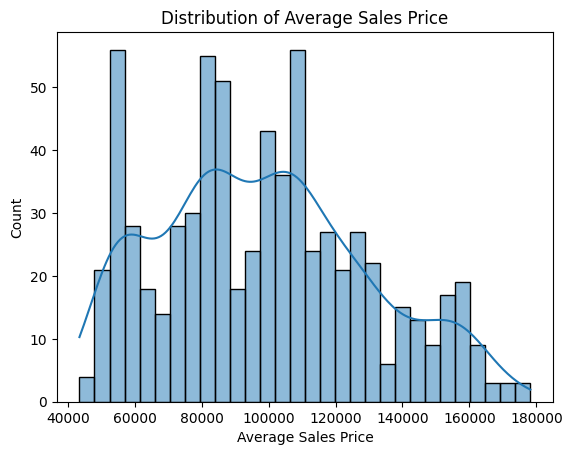

/var/folders/46/tr7jpvg55437fx19_y030wb40000gn/T/ipykernel_9084/1503013309.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=df, palette='pastel')


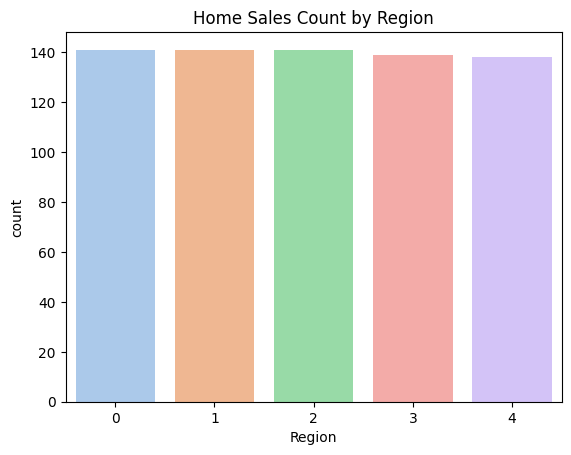

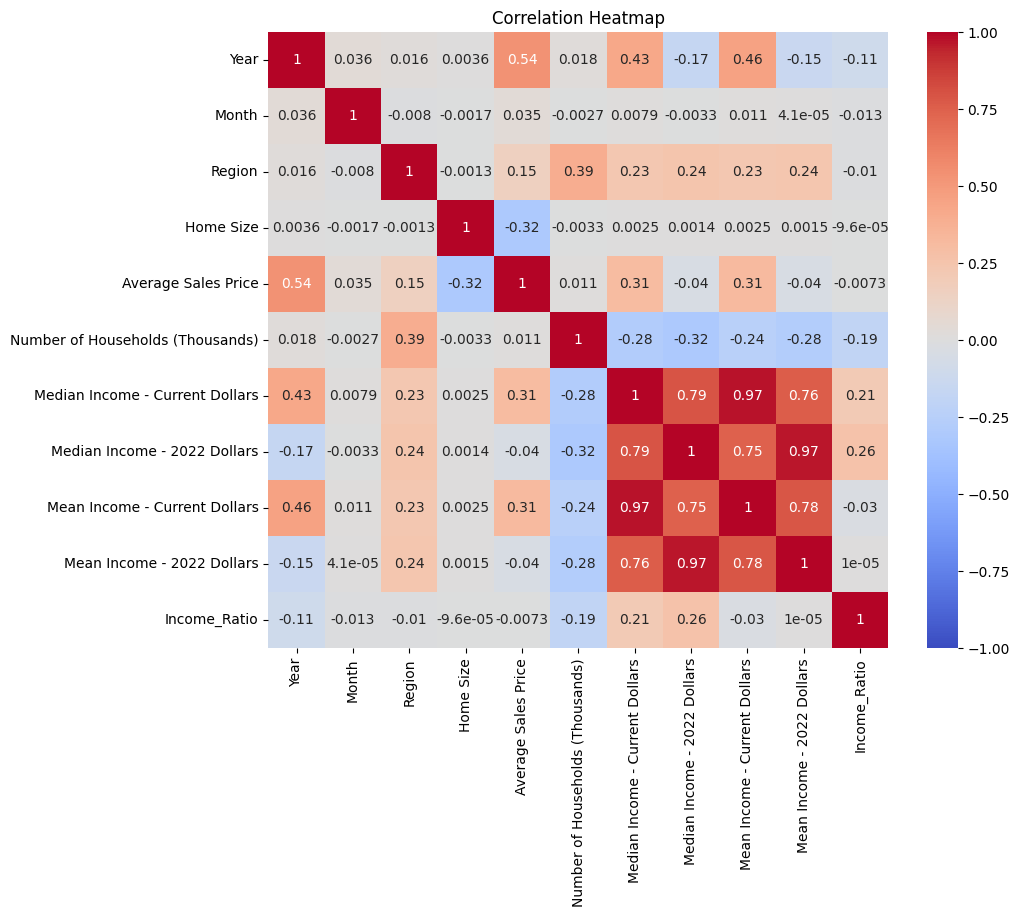

In [85]:
# Visualization:
# Univariate Analysis
sns.histplot(df['Average Sales Price'], bins=30, kde=True)
plt.title('Distribution of Average Sales Price')
plt.show()

# Bivariate Analysis
sns.countplot(x='Region', data=df, palette='pastel')
plt.title('Home Sales Count by Region')
plt.show()

# Correlation Heatmap
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [86]:
#3.Train-Test Split
#Prepare features and target for the model:
X = df.drop(columns=['Purchase Completion'])  # Features
y = df['Purchase Completion']  # Target

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Gaussian Naive Bayes - Accuracy Score: 0.4857142857142857
Gaussian Naive Bayes - Classification Report:
               precision    recall  f1-score   support

          No       0.52      0.72      0.61       115
         Yes       0.37      0.20      0.26        95

    accuracy                           0.49       210
   macro avg       0.45      0.46      0.43       210
weighted avg       0.45      0.49      0.45       210



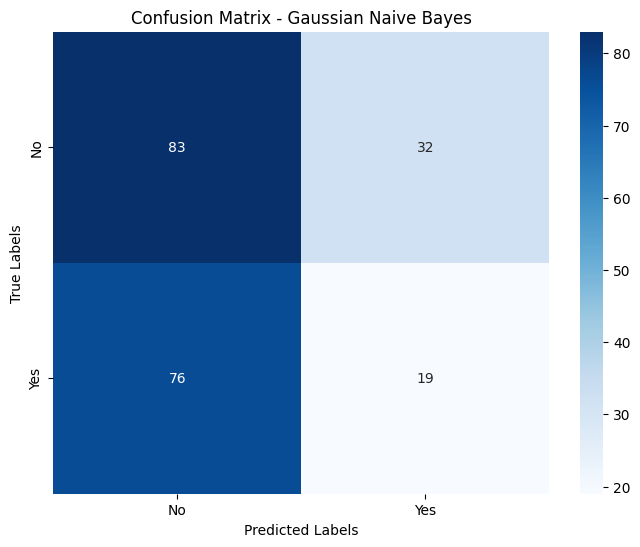

In [87]:
#4. Train Gaussian Naive Bayes Classifier
# Scale features for Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train_scaled)
y_pred_gnb = gnb.predict(X_test_scaled)

# Evaluate Gaussian Naive Bayes
print("Gaussian Naive Bayes - Accuracy Score:", accuracy_score(y_test_scaled, y_pred_gnb))
print("Gaussian Naive Bayes - Classification Report:\n", classification_report(y_test_scaled, y_pred_gnb))

# Confusion Matrix for Gaussian Naive Bayes
cm_gnb = confusion_matrix(y_test_scaled, y_pred_gnb)

# Plot Confusion Matrix for Gaussian Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gnb, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Multinomial Naive Bayes - Accuracy Score: 0.5476190476190477
Multinomial Naive Bayes - Classification Report:
               precision    recall  f1-score   support

          No       0.55      1.00      0.71       115
         Yes       0.00      0.00      0.00        95

    accuracy                           0.55       210
   macro avg       0.27      0.50      0.35       210
weighted avg       0.30      0.55      0.39       210



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

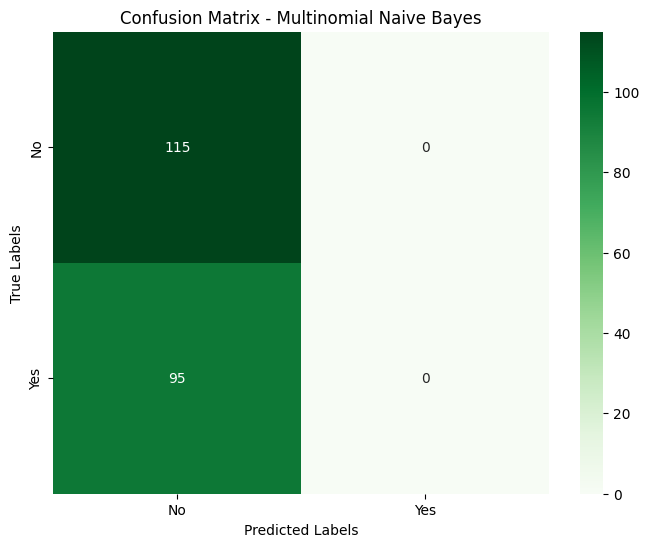

In [88]:
#5.Train Multinomial Naive Bayes Classifier**
# Scale features for Multinomial Naive Bayes using MinMaxScaler
minmax_scaler = MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(X)
X_train_mm, X_test_mm, y_train_mm, y_test_mm = train_test_split(
    X_minmax, y, test_size=0.3, random_state=42, stratify=y)

mnb = MultinomialNB()
mnb.fit(X_train_mm, y_train_mm)
y_pred_mnb = mnb.predict(X_test_mm)

# Evaluate Multinomial Naive Bayes
print("Multinomial Naive Bayes - Accuracy Score:", accuracy_score(y_test_mm, y_pred_mnb))
print("Multinomial Naive Bayes - Classification Report:\n", classification_report(y_test_mm, y_pred_mnb))

# Confusion Matrix for Multinomial Naive Bayes
cm_mnb = confusion_matrix(y_test_mm, y_pred_mnb)

# Plot Confusion Matrix for Multinomial Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mnb, annot=True, fmt="d", cmap="Greens", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [89]:
#6.Cross-Validation for Gaussian Naive Bayes
cv_scores = cross_val_score(gnb, X_scaled, y, cv=10, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())
print("Standard Deviation of Cross-Validation Accuracy:", cv_scores.std())

Cross-Validation Scores: [0.55714286 0.55714286 0.55714286 0.55714286 0.51428571 0.54285714
 0.54285714 0.54285714 0.48571429 0.54285714]
Mean Cross-Validation Accuracy: 0.5399999999999999
Standard Deviation of Cross-Validation Accuracy: 0.021946130708196034


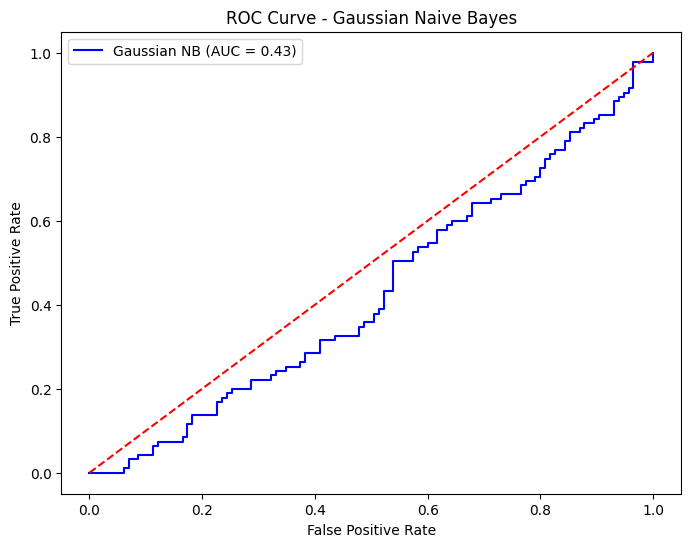

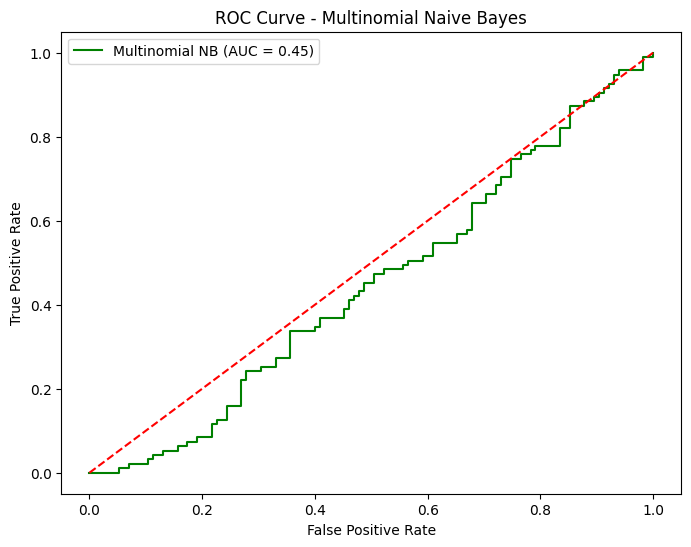

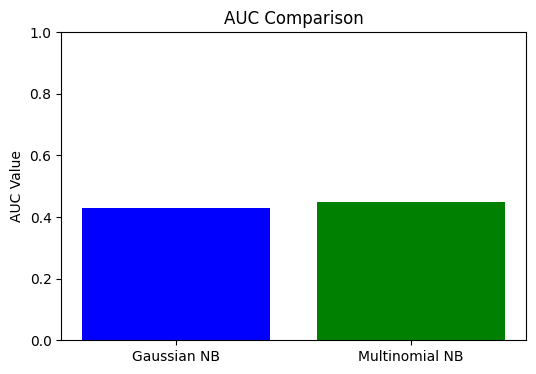

In [90]:
#7.ROC Curve and AUC
# Convert target labels to binary directly (Yes -> 1, No -> 0)
y_test_binary = y_test.replace({'Yes': 1, 'No': 0}).values

# ROC for Gaussian Naive Bayes
fpr_gnb, tpr_gnb, _ = roc_curve(y_test_binary, gnb.predict_proba(X_test)[:, 1])
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

# ROC for Multinomial Naive Bayes
fpr_mnb, tpr_mnb, _ = roc_curve(y_test_binary, mnb.predict_proba(X_test)[:, 1])
roc_auc_mnb = auc(fpr_mnb, tpr_mnb)

# Plot ROC Curve for Gaussian Naive Bayes
plt.figure(figsize=(8, 6))
plt.plot(fpr_gnb, tpr_gnb, color='blue', label=f'Gaussian NB (AUC = {roc_auc_gnb:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve - Gaussian Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Plot ROC Curve for Multinomial Naive Bayes
plt.figure(figsize=(8, 6))
plt.plot(fpr_mnb, tpr_mnb, color='green', label=f'Multinomial NB (AUC = {roc_auc_mnb:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve - Multinomial Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Plot AUC (Bar Graph for Comparison)
plt.figure(figsize=(6, 4))
plt.bar(['Gaussian NB', 'Multinomial NB'], [roc_auc_gnb, roc_auc_mnb], color=['blue', 'green'])
plt.title('AUC Comparison')
plt.ylabel('AUC Value')
plt.ylim(0, 1)
plt.show()


Random Forest - Accuracy Score: 0.4523809523809524
Random Forest - Classification Report:
               precision    recall  f1-score   support

          No       0.50      0.57      0.53       115
         Yes       0.38      0.32      0.34        95

    accuracy                           0.45       210
   macro avg       0.44      0.44      0.44       210
weighted avg       0.44      0.45      0.45       210



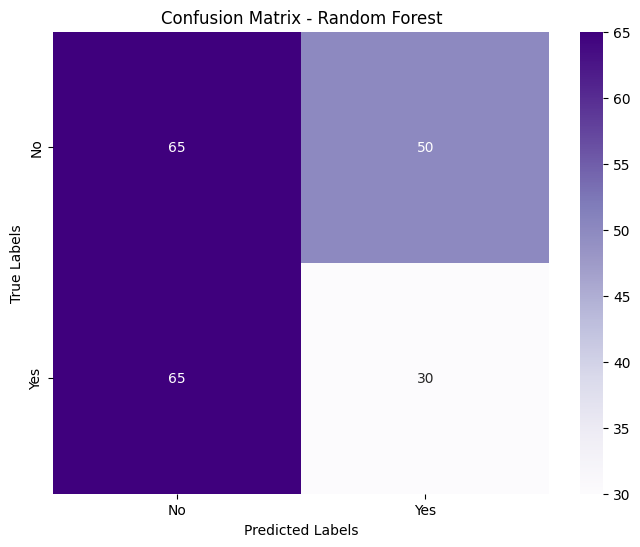

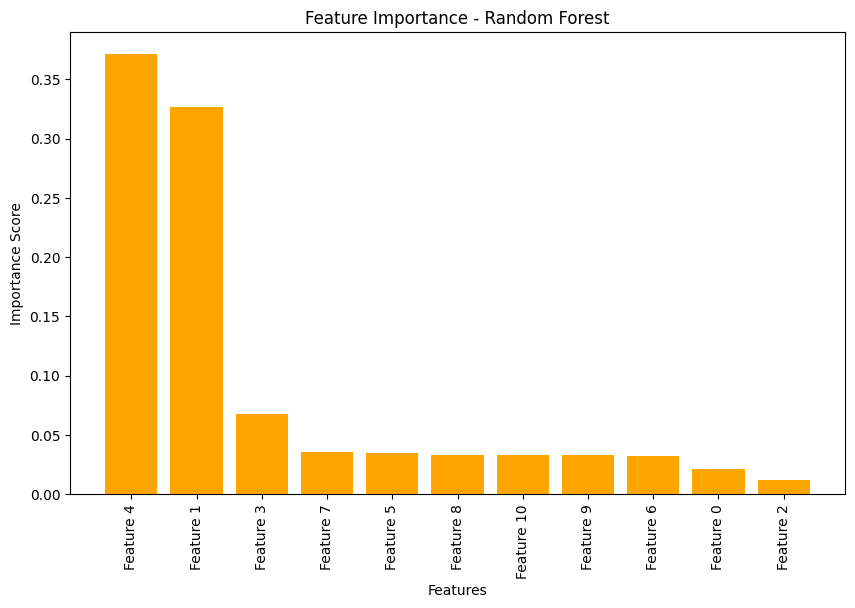

In [91]:
# 8. Train Random Forest Classifier
rfc = RandomForestClassifier(random_state=42, n_estimators=100)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

# Evaluate Random Forest Classifier
print("Random Forest - Accuracy Score:", accuracy_score(y_test, y_pred_rfc))
print("Random Forest - Classification Report:\n", classification_report(y_test, y_pred_rfc))

# Confusion Matrix for Random Forest
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rfc, annot=True, fmt="d", cmap="Purples", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Feature Importance for Random Forest
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns if hasattr(X, 'columns') else [f"Feature {i}" for i in range(X.shape[1])]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align="center", color="orange")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


In [ ]:
#. Train Bernoulli Naive Bayes Classifier
# Scale features for Gaussian Naive Bayes
b = BernoulliNB()
b.fit(X_train_scaled, y_train_scaled)
y_pred_b = b.predict(X_test_scaled)

# Evaluate Gaussian Naive Bayes
print("Bernoulli Naive Bayes - Accuracy Score:", accuracy_score(y_test_scaled, y_pred_b))
print("Bernoulli Naive Bayes - Classification Report:\n", classification_report(y_test_scaled, y_pred_gnb))

# Confusion Matrix for Gaussian Naive Bayes
cm_b = confusion_matrix(y_test_scaled, y_pred_b)

# Plot Confusion Matrix for Gaussian Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gnb, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()